In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard
from time import time
from keras import regularizers

Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "encoded" is the encoded representation of the input
hidden_1 = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(1e-7))(hidden_1)

# "decoded" is the lossy reconstruction of the input
hidden_2 = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input=input_img, output=decoded)

#seperate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

#let's create a seperate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [4]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11493376/11490434 [==============================] - 5s 0us/step


In [5]:
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.3564 - accuracy: 0.7447 - val_loss: 0.2702 - val_accuracy: 0.7949
Epoch 2/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.2608 - accuracy: 0.7954 - val_loss: 0.2469 - val_accuracy: 0.7926
Epoch 3/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.2365 - accuracy: 0.7938 - val_loss: 0.2251 - val_accuracy: 0.7934
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.2183 - accuracy: 0.7947 - val_loss: 0.2097 - val_accuracy: 0.7952
Epoch 5/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.2051 - accuracy: 0.7966 - val_loss: 0.1979 - val_accuracy: 0.7970


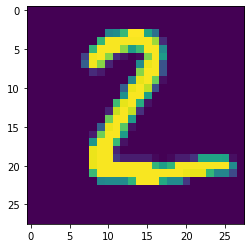

In [6]:
from matplotlib import pyplot as plt
plt.imshow(x_test[1].reshape(28,28))
plt.show()


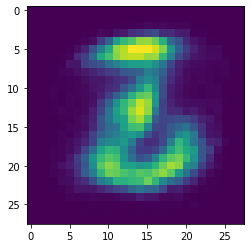

In [7]:
prediction = autoencoder.predict(x_test[1].reshape(1,784))
plt.imshow(prediction.reshape(28,28))
plt.show()

In [8]:
# final accuracy result
score,acc = autoencoder.evaluate(x_test, x_test, verbose=2)
print("Loss: %.3f" % (score))
print("Accuracy: %.3f" %(acc))

Loss: 0.195
Accuracy: 0.797


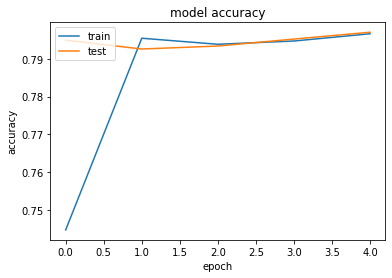

In [9]:
#sumarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

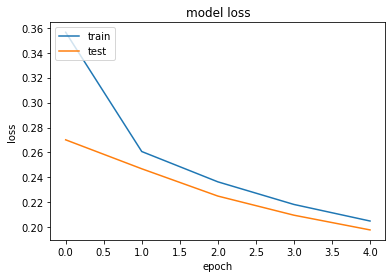

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()